# Paria Rezayan
# Classification using Logistic Regression, Decision Trees, Random Forest Classifier, and KNN
The dataset used in this project can be found on https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set.

# Introduction:
Classification is a type of supervised learning algorithm that is used to predict a target variable by classifying the input data into two or more classes. In this project, I will focus on implementing different classification models for a given dataset with the objective of predicting the risk level of a patient's health condition.

# Dataset:
The dataset contains information about patients' age, blood pressure (systolic and diastolic), blood sugar level, body temperature, heart rate, and risk level. The risk level is the target variable, which can take three values - low, moderate, or high. There are 1014 rows in the dataset.

# Methodology:

1) Data Preprocessing: The first step is to preprocess the data by scaling it using StandardScaler and splitting it into training and testing sets using train_test_split function. This step ensures that the features have similar ranges and that the models are trained on independent data.
2) Model Implementation: Next, four classification models are implemented: a. Logistic Regression: An instance of the LogisticRegression class with "class_weight" set as 'balanced' is created. Logistic Regression is a linear model that works well when there is a linear relationship between the features and the target variable. b. Decision Tree Classifier: An instance of the DecisionTreeClassifier class is created. Decision Trees are non-parametric models that work well when there is a non-linear relationship between the features and the target variable. c. Random Forest Classifier: An instance of the RandomForestClassifier class with the criterion set as 'gini' is created. Random Forest is an ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting. d. K-nearest Neighbors (KNN): Two classifiers with k=5 and k=1 are created. KNN is a non-parametric model that works well when there are clusters in the data.
3) Model Evaluation: After implementing all the models, I have evaluated their performance metrics like accuracy, precision, and confusion matrix. Accuracy measures the percentage of correct predictions made by the model. Precision measures the ratio of true positives to true positives plus false positives. The confusion matrix gives insights into the number of true positives, true negatives, false positives, and false negatives predicted by the model. I have also plotted the confusion matrix for all the models using the seaborn heatmap function.
4) Conclusion: Finally, I have concluded the project by comparing the performance of all the models.

# Objective:
The objective of this classification project is to implement different classification models for the given dataset and evaluate their performance metrics like accuracy, precision, and confusion matrix.

# Steps:

1) Data Preprocessing
2) Model Implementation
3) Model Evaluation
4) Conclusion

In [23]:
# importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

In [24]:
# reading data
data = pd.read_csv('Maternal Health Risk Data Set.csv')

# Exploring the dataset:

In [25]:
# getting to know the dataset
data.shape

(1014, 7)

The raw data consists of 1014 rows and 7 columns.

Having known the shape of the data, it is time to familiarize ourselves with some additional information about the data:

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Attribute Information:

1. Age: Any ages in years when a women is pregnant.
2. SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
3. DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
4. BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
5. HeartRate: A normal resting heart rate in beats per minute.
6. Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attributes.

In [27]:
data.head(15)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [28]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [29]:
# checking for non-numeric data points
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

As demonstrated, all the columns, except for 'RiskLevel', contain numerical values. Being the target variable, the object values in 'RiskLevel' need to be converted into numerical ones. 

In [30]:
# printting all the unique values in the 'RiskLevel' column
risk_levels = data['RiskLevel'].unique()
print(risk_levels)


['high risk' 'low risk' 'mid risk']


In [31]:
# calculating the frequency of each unique value in the 'RiskLevel' column 
risk_level_counts = data['RiskLevel'].value_counts(normalize=True)
print(risk_level_counts)

RiskLevel
low risk     0.400394
mid risk     0.331361
high risk    0.268245
Name: proportion, dtype: float64


# EDA: 

Exploring distribution pattern of the dependent variable of 'Risk Level':

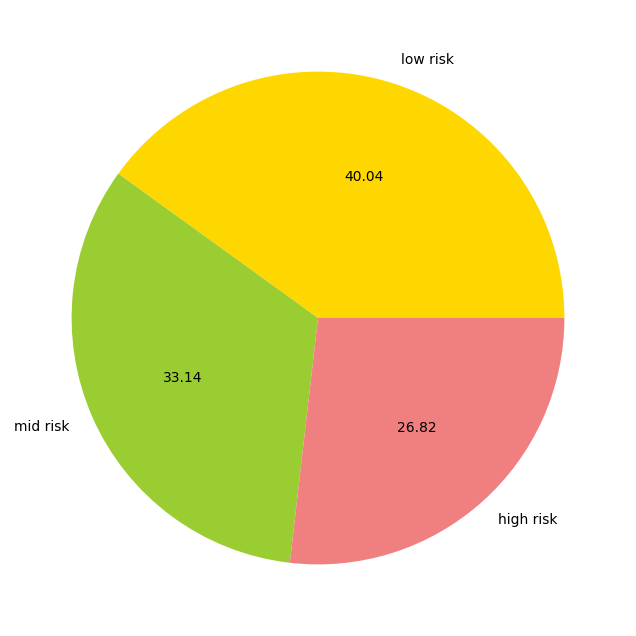

In [32]:
# plotting the proportions for the 'RiskLevel' column
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
risk_level_counts = data['RiskLevel'].value_counts(normalize=True)
plt.figure(figsize = (8, 8))
plt.pie(risk_level_counts.values, labels=risk_level_counts.index, autopct = '%.2f', colors=colors)
plt.show()

Exploring distribution pattern of the independent variables of 'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate' and 'BodyTemp':

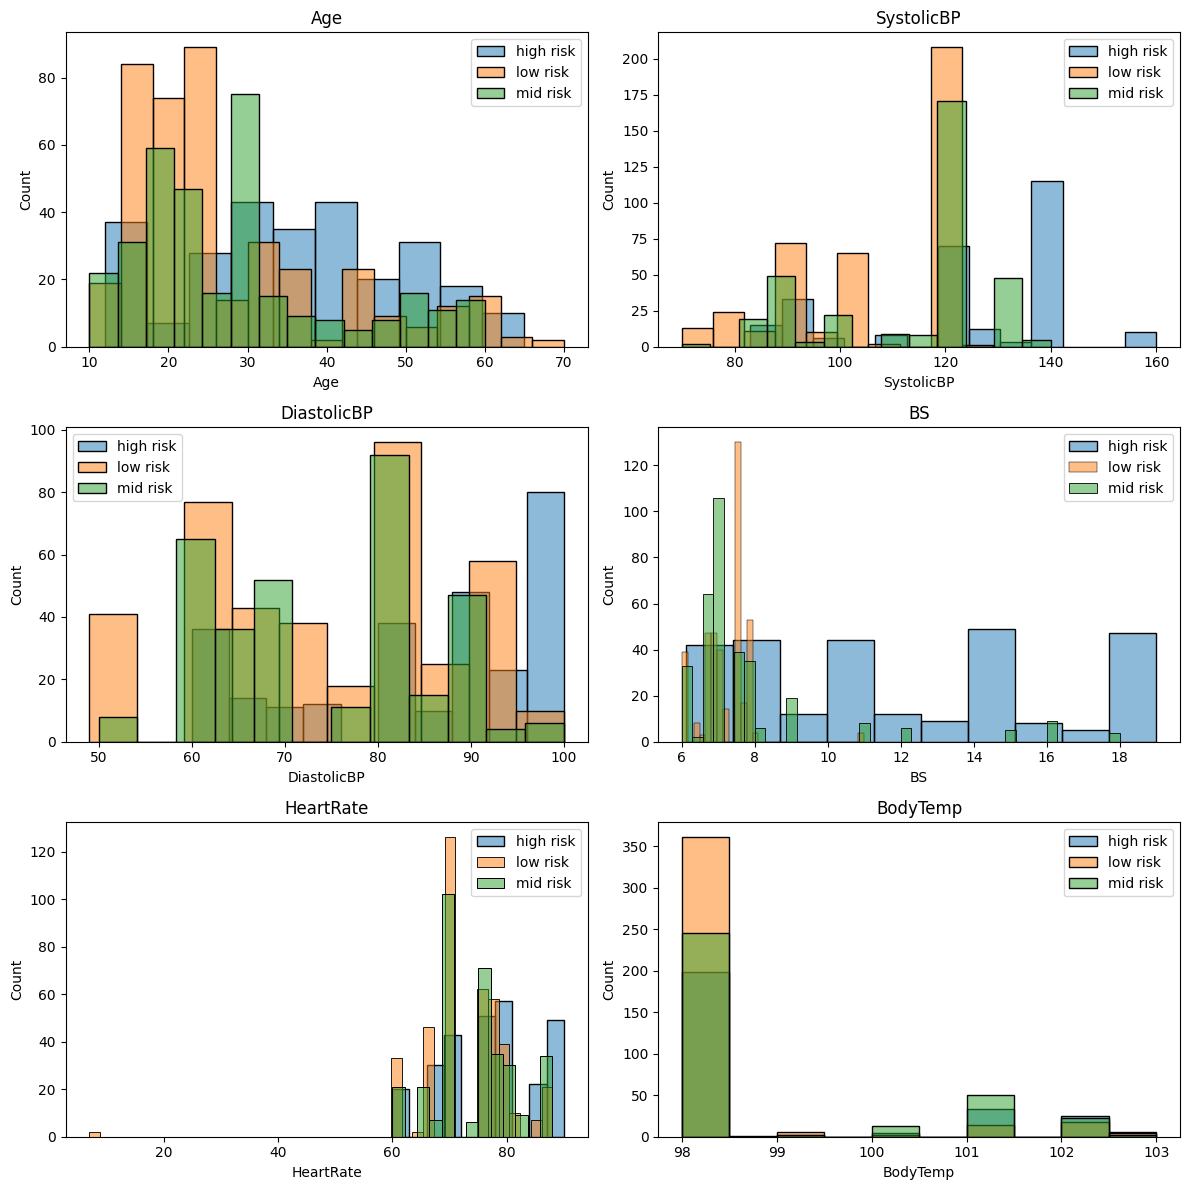

In [34]:
# creating subplots for each numeric variable
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.ravel()
for i, col in enumerate(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'BodyTemp']):
    for j, risk_level in enumerate(data.RiskLevel.unique()):
        sns.histplot(data = data.loc[data.RiskLevel == risk_level, col], ax = axs[i], alpha = 0.5, label = risk_level)
        axs[i].set_title(col)
        
    axs[i].legend()
    
plt.tight_layout()
plt.show()

The following sets of 3 subplots pertain to the relationships between: 
    1. 'DiastolicBP' and 'SystolicBP' 
    2. 'RiskLevel' and 'BS'
    3. 'Age' and 'BS'


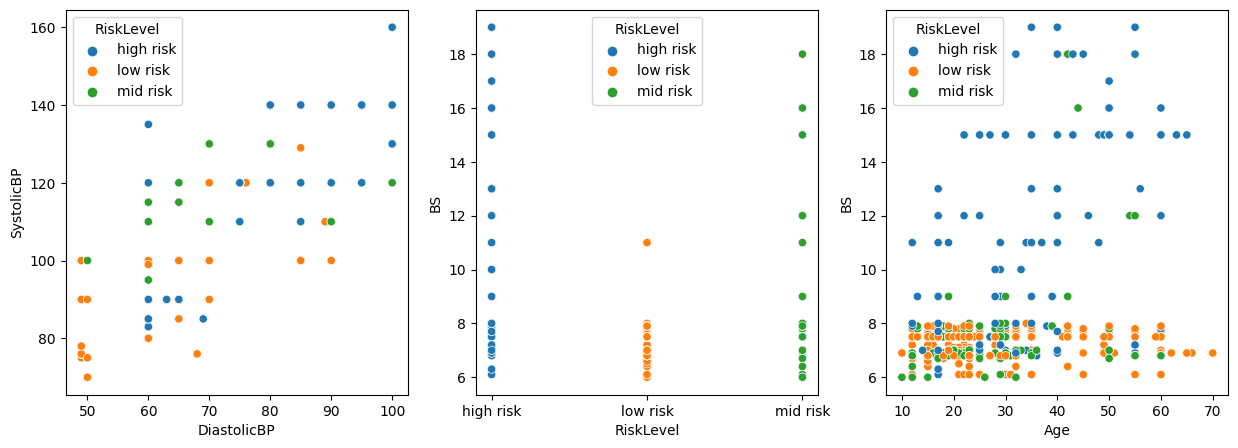

In [37]:
plt.figure(figsize=(15,5))

# scatter plot for the relationship between 'DiastolicBP' and 'SystolicBP'
plt.subplot(1,3,1)
sns.scatterplot(x='DiastolicBP', y='SystolicBP', hue='RiskLevel', data=data)

#scatter plot for the second subplot shows the relationship between 'RiskLevel' and 'BS' 
plt.subplot(1,3,2)
sns.scatterplot(x='RiskLevel', y='BS', hue='RiskLevel', data=data)

# scatter plot for the relationship between 'Age' and 'BS'
plt.subplot(1,3,3)
sns.scatterplot(x='Age', y='BS', hue='RiskLevel', data=data)

plt.show()

The next two box plots display the distribution of 'DiastolicBP' and 'SystolicBP' data across different 'RiskLevel' categories.

[Text(0.5, 1.0, 'Distribution based on DiastolicBP')]

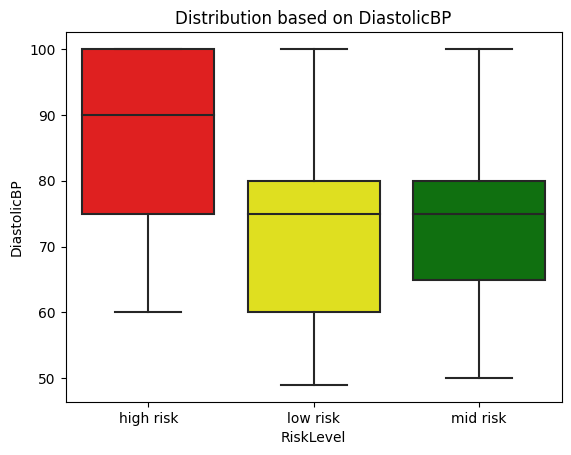

In [41]:
# creating a box plot for the relationship between 'DiastolicBP' and 'RiskLevel'
risk_levels_colors = {"high risk": "red", "mid risk": "yellow", "low risk": "green"}
palette = [risk_levels_colors[x] for x in risk_levels_colors.keys()]
sns.boxplot(x = "RiskLevel", y = "DiastolicBP", data = data, palette = palette).set(title = "Distribution based on DiastolicBP")

[Text(0.5, 1.0, 'Distribution based on SystolicBP')]

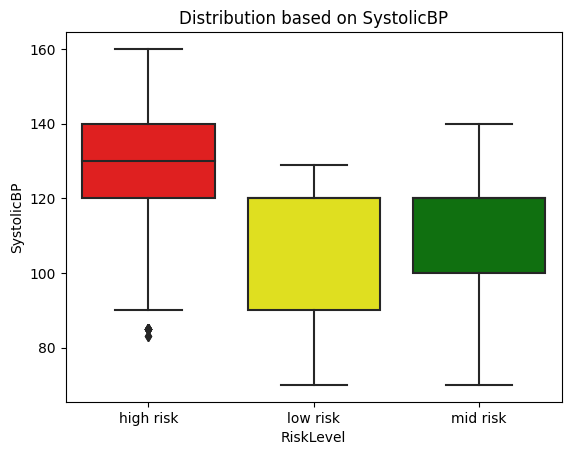

In [44]:
# creating a box plot for the relationship between 'SystolicBP' and 'RiskLevel'
sns.boxplot(x = "RiskLevel", y = "SystolicBP", data = data, palette = palette).set(title = "Distribution based on SystolicBP")

Now it is time to replace string values in 'RiskLevel' with numbers representing the 3 different levels:

In [45]:
# defining the mapping
risk_map = {'low risk': 1, 'mid risk': 2, 'high risk': 3}

# replacing the string values with numerical values using the mapping
data['RiskLevel'] = data['RiskLevel'].map(risk_map)

In [46]:
# defining x and y
x = data.drop(columns=['RiskLevel'])
y = data['RiskLevel']

In [48]:
print(y)

0       3
1       3
2       3
3       3
4       1
       ..
1009    3
1010    3
1011    3
1012    3
1013    2
Name: RiskLevel, Length: 1014, dtype: int64


Subsequently, the correlation matrix plot for the features in the dataset is coded for the sake of showing the correlation coefficients between these variables:

In [49]:
# creating a correlation matrix
corr_matrix = x.corr()
print(corr_matrix)

                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000


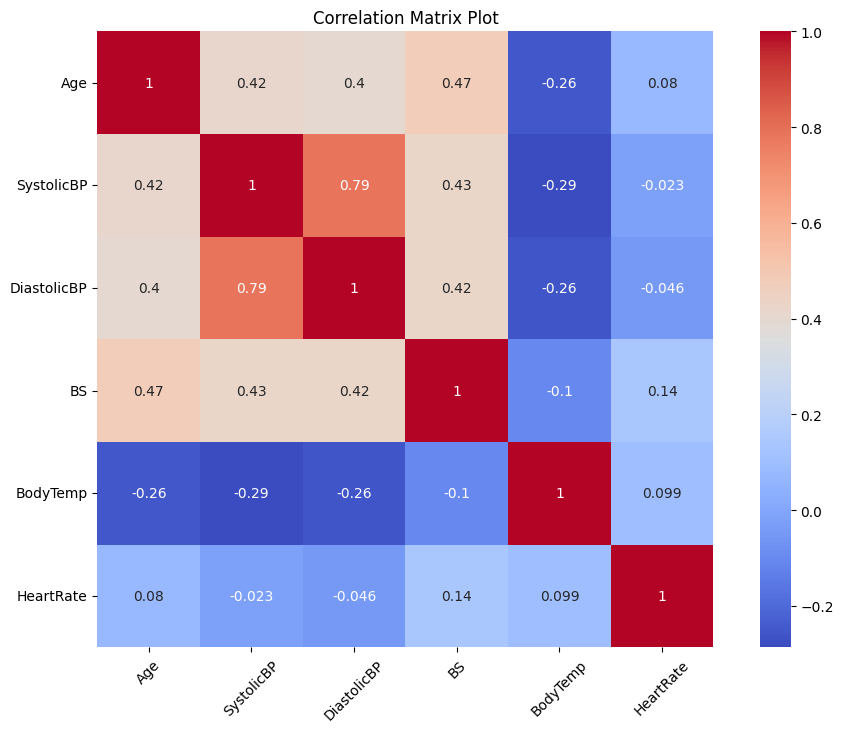

In [50]:
# plotting the correlation matrix using Seaborn heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Matrix Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Data Preprocessing: 

In [51]:
#scaling data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# printting the first 5 rows of x
print(scaled_x[:5])

[[-0.36173812  0.91339632  0.25502279  1.90589019 -0.4852155   1.44695615]
 [ 0.38077697  1.45702716  0.97553854  1.29833966 -0.4852155  -0.53208757]
 [-0.06473208 -1.26112705 -0.46549297 -0.22053665  0.97388449  0.70481475]
 [ 0.00951942  1.45702716  0.61528066 -0.52431191 -0.4852155  -0.53208757]
 [ 0.38077697  0.36976548 -1.18600873 -0.79770964 -0.4852155   0.21005383]]


In [52]:
# splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,train_size = 0.70,stratify = y,random_state = 101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((709, 6), (305, 6), (709,), (305,))

In [53]:
print("Shape of x_train:", x_train.size)
print("Shape of x_test:", x_test.size)
print(data)

Shape of x_train: 4254
Shape of x_test: 1830
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86          3
1      35         140           90  13.0      98.0         70          3
2      29          90           70   8.0     100.0         80          3
3      30         140           85   7.0      98.0         70          3
4      35         120           60   6.1      98.0         76          1
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80          3
1010   55         120           90  18.0      98.0         60          3
1011   35          85           60  19.0      98.0         86          3
1012   43         120           90  18.0      98.0         70          3
1013   32         120           65   6.0     101.0         76          2

[1014 rows x 7 columns]


# Model Implementation:

# 1. Logistic Regression:

In [54]:
# an instance of LogisticRegression model
Model_1 = LogisticRegression(class_weight = 'balanced')
Model_1.fit(x_train, y_train)

# predicting the class labels for the test data 
predicted_values = Model_1.predict(x_test)

# printing the predicted class labels for the test data
print("Predicted Values:\n", predicted_values)

Predicted Values:
 [1 2 1 2 2 1 3 2 1 3 3 1 3 2 2 3 3 1 1 2 1 2 2 3 3 3 1 1 1 1 1 1 1 2 1 1 3
 3 1 2 2 1 1 2 3 1 1 3 2 1 1 3 3 2 1 2 2 2 1 2 3 1 3 2 3 2 1 1 2 3 2 2 3 1
 1 1 2 2 2 3 1 3 1 1 1 1 2 1 2 2 1 3 1 1 1 2 3 1 2 1 1 1 2 1 2 3 2 1 1 2 2
 3 2 2 3 2 1 2 2 2 1 1 2 2 1 3 2 2 1 3 3 3 1 3 3 2 1 2 1 3 1 3 1 1 1 3 1 1
 1 3 2 2 2 1 3 2 2 2 1 1 1 2 3 1 2 2 1 2 2 2 1 2 1 3 3 3 1 1 1 2 1 3 1 2 3
 2 1 3 2 2 3 3 1 1 2 1 1 2 1 3 3 2 1 3 3 1 1 2 1 1 2 3 1 3 1 3 1 3 3 2 2 1
 3 1 2 2 3 2 3 3 2 1 1 1 1 3 1 1 1 3 1 2 2 1 2 2 2 1 1 2 3 1 2 3 2 3 2 2 1
 3 1 3 2 2 2 1 1 1 3 2 3 1 3 1 1 3 2 2 1 1 2 1 2 3 1 2 2 3 1 2 1 3 2 1 2 2
 2 1 3 1 2 3 1 3 2]


In [55]:
# predicting the probability estimates of the classes for the test data
predicted_probabilities = Model_1.predict_proba(x_test)
print("\nPredicted Probabilities:\n", predicted_probabilities)
print(predicted_probabilities.shape) 


Predicted Probabilities:
 [[4.64021692e-01 4.20893710e-01 1.15084599e-01]
 [1.52069220e-01 6.62363875e-01 1.85566905e-01]
 [4.89717140e-01 3.76830593e-01 1.33452267e-01]
 [3.58514794e-01 3.59307460e-01 2.82177746e-01]
 [2.17853759e-01 5.02318609e-01 2.79827632e-01]
 [5.42373723e-01 2.86797459e-01 1.70828818e-01]
 [7.35743861e-03 2.05860924e-01 7.86781637e-01]
 [1.44932065e-01 4.72383418e-01 3.82684518e-01]
 [6.97767334e-01 2.79973609e-01 2.22590570e-02]
 [1.37895119e-01 3.41293333e-01 5.20811548e-01]
 [2.81924151e-05 5.40606713e-03 9.94565740e-01]
 [4.72944204e-01 4.42297234e-01 8.47585614e-02]
 [7.09673852e-02 3.29460142e-01 5.99572472e-01]
 [2.79774211e-01 3.86767667e-01 3.33458122e-01]
 [4.15671499e-01 5.42479258e-01 4.18492431e-02]
 [1.26676408e-04 1.12478702e-02 9.88625453e-01]
 [7.09673852e-02 3.29460142e-01 5.99572472e-01]
 [4.64021692e-01 4.20893710e-01 1.15084599e-01]
 [8.19717631e-01 1.72989647e-01 7.29272144e-03]
 [3.46030763e-01 5.31061168e-01 1.22908069e-01]
 [7.07756010e

# Model Evaluation for Logistic Regression: 

In [56]:
# creating a confusion matrix for our Logistic Regression model 
cm_1 = confusion_matrix(y_test, predicted_values)
conf_matrix_df = pd.DataFrame(cm_1,
                    index = ['3', '2', '1'], 
                    columns = ['3', '2', '1'])

cm_1

array([[78, 40,  4],
       [43, 42, 16],
       [ 2, 23, 57]], dtype=int64)

In [58]:
# claculating the accuracy score for our Logistic Regression model 
acc_1 = accuracy_score(y_test, predicted_values)
print("Accuracy Score for LR:", acc_1)

Accuracy Score for LR: 0.580327868852459


In [59]:
# claculating the precision score for our Logistic Regression model 
precision_micro_1 = precision_score(y_test, predicted_values, average='micro')
print("Micro-averaged Precision Score for LR:", precision_micro_1)

precision_macro_1 = precision_score(y_test, predicted_values, average='macro')
print("Macro-averaged Precision Score for LR:", precision_macro_1)

precision_weighted_1 = precision_score(y_test, predicted_values, average='weighted')
print("Weighted-averaged Precision Score for LR:", precision_weighted_1)

Micro-averaged Precision Score for LR: 0.580327868852459
Macro-averaged Precision Score for LR: 0.5914686939077183
Weighted-averaged Precision Score for LR: 0.5851382044584764


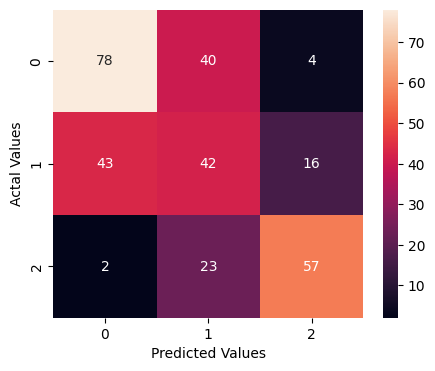

In [60]:
# plotting the confusion matrix for our Logistic Regression model 
plt.figure(figsize = (5,4))
sns.heatmap(cm_1, annot = True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [61]:
# calculating the mean accuracy on the given test data for our Logistic Regression model 
print(Model_1.score(x_test,y_test))

0.580327868852459


In [62]:
# generating a classification report for the predicted values
Rep_1 = classification_report(y_test,predicted_values)
print(Rep_1)

              precision    recall  f1-score   support

           1       0.63      0.64      0.64       122
           2       0.40      0.42      0.41       101
           3       0.74      0.70      0.72        82

    accuracy                           0.58       305
   macro avg       0.59      0.58      0.59       305
weighted avg       0.59      0.58      0.58       305



# 2. Decision Tree Classifier

In [63]:
# an instance of Decision Tree Classifier
Model_2 = DecisionTreeClassifier()
Model_2.fit(x_train, y_train)

# predicting the class labels for the test data
predicted_values_2 = Model_2.predict(x_test)

# printing the predicted class labels for the test data
print("Predicted Values:\n", predicted_values_2)

Predicted Values:
 [2 2 1 1 1 1 3 1 1 2 3 2 3 3 1 3 3 2 1 1 1 3 2 3 3 3 1 1 1 2 2 2 1 3 2 1 3
 3 1 3 2 2 1 2 2 2 2 2 1 1 1 3 3 2 2 2 2 2 1 3 3 2 3 2 3 2 1 1 2 2 2 2 3 2
 1 1 1 2 1 3 1 3 1 2 1 1 2 1 2 2 1 3 1 1 3 3 3 2 2 1 1 1 2 1 2 2 1 2 1 1 2
 2 3 1 3 3 1 1 1 2 1 1 1 1 1 3 2 2 1 3 2 2 1 3 2 1 2 1 1 2 1 3 1 1 1 3 2 2
 1 2 3 1 3 1 3 1 1 1 1 2 2 1 3 1 2 1 1 2 1 1 1 2 1 3 3 3 2 1 2 2 1 2 2 3 3
 1 1 3 2 3 3 3 2 1 2 1 1 2 2 3 2 2 2 1 3 1 1 2 1 2 2 3 2 3 2 3 2 3 3 1 1 1
 2 1 2 2 3 2 3 3 2 2 1 2 3 2 2 1 2 3 2 2 1 2 3 1 2 2 2 3 3 2 2 2 3 3 1 2 2
 3 1 3 1 2 2 2 2 2 2 2 3 1 2 2 1 2 1 1 3 1 1 1 2 3 1 1 3 3 2 2 1 2 1 1 2 1
 2 2 3 2 1 3 1 3 2]


In [64]:
# predicting the probability estimates of the classes for the test data
predicted_probabilities_2 = Model_2.predict_proba(x_test)

# printing the predicted probabilities
print("\nPredicted Probabilities:\n", predicted_probabilities_2)
print(predicted_probabilities_2.shape) 


Predicted Probabilities:
 [[0.28       0.72       0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.15       0.25       0.6       ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.15       0.25       0.6       ]
 [0.28       0.72       0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.5        0.5        0.        ]
 [0.         0.         1.        ]
 [0.3125     0.6875     0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.5        0.5        0.        ]
 

# Model Evaluation for Decision Tree Classifier:

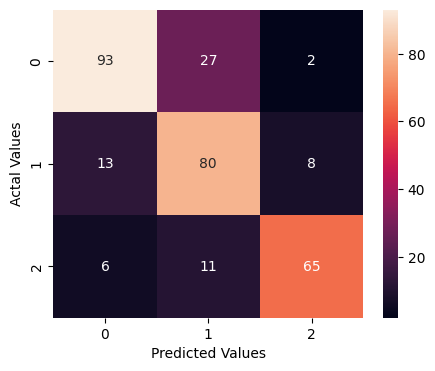

In [65]:
# plotting the confusion matrix for Decision Tree
cf_2 = confusion_matrix(y_test,predicted_values_2)
plt.figure(figsize=(5,4))
sns.heatmap(cf_2, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [66]:
# calculating the mean accuracy on the given test data for Decision Tree
print(Model_2.score(x_test,y_test))

0.780327868852459


In [67]:
# generating a classification report for the predicted values
Rep_2 = classification_report(y_test,predicted_values_2)
print(Rep_2)

              precision    recall  f1-score   support

           1       0.83      0.76      0.79       122
           2       0.68      0.79      0.73       101
           3       0.87      0.79      0.83        82

    accuracy                           0.78       305
   macro avg       0.79      0.78      0.78       305
weighted avg       0.79      0.78      0.78       305



# 3. Random Forest Classifier

In [68]:
# an instance of Random Forest Classifier
Model_3 = RandomForestClassifier(criterion='gini')
Model_3.fit(x_train, y_train)

# predicting the class labels for the test data
predicted_values_3 = Model_3.predict(x_test)

# printing the predicted class labels for the test data
print("Predicted Values:\n", predicted_values_3)

Predicted Values:
 [2 2 1 1 1 2 3 1 1 2 3 2 3 3 1 3 3 2 1 1 2 3 2 3 3 3 1 1 1 2 2 2 1 3 2 1 3
 3 1 2 2 2 1 2 2 2 2 2 1 1 2 3 3 2 2 2 2 2 1 3 3 1 3 2 3 2 1 1 2 2 2 2 3 2
 1 1 1 2 1 3 1 3 1 2 1 1 2 1 1 2 2 3 1 1 3 3 3 2 2 1 1 1 2 1 2 2 1 2 1 1 2
 2 3 1 3 3 1 1 1 2 1 1 1 1 1 3 2 2 1 3 2 2 1 3 2 1 1 1 1 2 1 3 1 1 1 3 2 2
 1 2 3 1 3 1 3 1 1 1 1 2 1 1 3 1 2 1 1 2 1 1 1 2 1 3 3 3 2 1 2 2 1 2 2 3 3
 1 1 3 2 3 3 3 2 1 2 1 1 2 1 3 2 2 2 1 3 1 1 2 1 2 2 3 2 3 1 3 2 2 2 1 1 1
 2 1 2 2 3 2 3 3 2 1 1 2 1 2 2 1 2 3 2 2 1 2 3 1 2 2 2 2 3 1 2 2 3 3 1 2 2
 3 1 3 1 2 2 1 2 2 2 2 3 1 2 2 1 2 1 1 1 1 1 1 2 3 1 1 3 3 2 1 1 2 1 1 2 1
 2 2 3 2 1 3 2 3 1]


In [69]:
# predicting the probability estimates of the classes for the test data
predicted_probabilities_3 = Model_3.predict_proba(x_test)

# printing the predicted probabilities
print("\nPredicted Probabilities:\n", predicted_probabilities_3)
print(predicted_probabilities.shape) 


Predicted Probabilities:
 [[2.74757515e-01 7.25242485e-01 0.00000000e+00]
 [1.06666667e-02 9.79333333e-01 1.00000000e-02]
 [6.50000000e-01 3.50000000e-01 0.00000000e+00]
 [6.83333333e-01 3.16666667e-01 0.00000000e+00]
 [9.65000000e-01 3.50000000e-02 0.00000000e+00]
 [4.60000000e-01 5.00000000e-01 4.00000000e-02]
 [5.00000000e-02 3.00000000e-02 9.20000000e-01]
 [6.80000000e-01 3.20000000e-01 0.00000000e+00]
 [9.08166667e-01 9.18333333e-02 0.00000000e+00]
 [2.00000000e-02 9.70000000e-01 1.00000000e-02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [2.70000000e-01 7.30000000e-01 0.00000000e+00]
 [1.47065540e-01 2.57207361e-01 5.95727099e-01]
 [1.00000000e-02 0.00000000e+00 9.90000000e-01]
 [9.36190476e-01 5.38095238e-02 1.00000000e-02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.47065540e-01 2.57207361e-01 5.95727099e-01]
 [2.74757515e-01 7.25242485e-01 0.00000000e+00]
 [9.21666667e-01 7.83333333e-02 0.00000000e+00]
 [8.34333333e-01 1.25666667e-01 4.00000000e-02]
 [4.71000000e

# Model Evaluation for Random Forest Classifier:

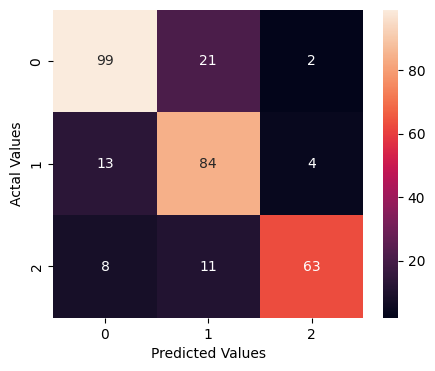

In [70]:
# plotting the confusion matrix for Random Forest
cf_3=confusion_matrix(y_test,predicted_values_3)
plt.figure(figsize=(5,4))
sns.heatmap(cf_3, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [71]:
# calculating the mean accuracy on the given test data for Random Forest
print(Model_3.score(x_test,y_test))

0.8065573770491803


In [72]:
# generating a classification report for the predicted values
Rep_3 = classification_report(y_test,predicted_values_3)
print(Rep_3)

              precision    recall  f1-score   support

           1       0.82      0.81      0.82       122
           2       0.72      0.83      0.77       101
           3       0.91      0.77      0.83        82

    accuracy                           0.81       305
   macro avg       0.82      0.80      0.81       305
weighted avg       0.82      0.81      0.81       305



# 3. K-nearest Neighbors (KNN)

In [73]:
# creating two classifiers (one with k=5 and one with k=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn1 = KNeighborsClassifier(n_neighbors=1)

# fitting each classifier to the train set
knn5.fit(x_train, y_train)
knn1.fit(x_train, y_train)

# making predictions on the test set
predictions_5 = knn5.predict(x_test)
predictions_1 = knn1.predict(x_test)

# calculating the accuracy of each classifier's predictions
accuracy_5 = accuracy_score(y_test, predictions_5) * 100
accuracy_1 = accuracy_score(y_test, predictions_1) * 100
print("Accuracy for k=5: ", accuracy_5)
print("Accuracy for k=1: ", accuracy_1)

Accuracy for k=5:  64.26229508196721
Accuracy for k=1:  78.36065573770492


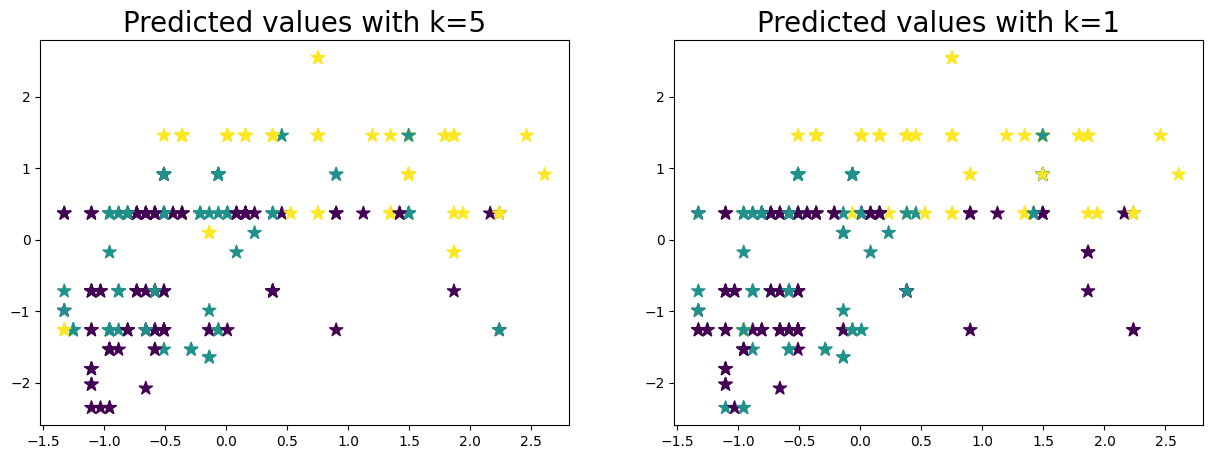

In [74]:
# plotting the predicted values using k=5 and k=1 as the number of neighbors
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0] , x_test[:,1], c = predictions_5 , marker = '*', s = 100)
plt.title("Predicted values with k=5", fontsize = 20)

plt.subplot(1,2,2)
plt.scatter(x_test[:,0] , x_test[:,1], c=predictions_1, marker = '*', s = 100)
plt.title("Predicted values with k=1", fontsize = 20)
plt.show()

# Model Evaluation for KNN:

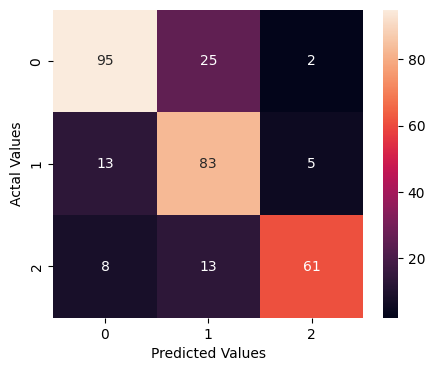

In [75]:
# plotting the confusion matrix for KNN1
cf_4 = confusion_matrix(y_test,predictions_1)
plt.figure(figsize = (5,4))
sns.heatmap(cf_4, annot = True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [70]:
# calculating the mean accuracy on the given test data for KNN1
print(knn1.score(x_test,y_test))

0.7836065573770492


In [76]:
# generating a classification report for the predicted values
Rep_4 = classification_report(y_test,predictions_1)
print(Rep_4)

              precision    recall  f1-score   support

           1       0.82      0.78      0.80       122
           2       0.69      0.82      0.75       101
           3       0.90      0.74      0.81        82

    accuracy                           0.78       305
   macro avg       0.80      0.78      0.79       305
weighted avg       0.80      0.78      0.79       305



# Conclusion:
In this report, I implemented four classification models for predicting the risk level of a patient's health condition. A glance at the model evaluations for the models above reveals that the Random Forest Classifier is the most efficient model for the classification of risk level during pregnancy. 
